In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hanoi_weather_data.csv")

In [3]:
features = ['temperature_2m', 'relative_humidity_2m', 'precipitation',
            'windspeed_10m', 'winddirection_10m', 'surface_pressure',
            'carbon_monoxide', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']

target = 'pm2_5'  

In [4]:
df = df[features + [target]].dropna()

In [5]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=10, gamma=0.1)
}


In [8]:
results = []

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train_scaled, y_train)

    # Dự đoán
    y_pred = model.predict(X_test_scaled)

    # Đánh giá
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

In [9]:
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print(" Kết quả so sánh các mô hình:")
print(results_df)

 Kết quả so sánh các mô hình:
                      Model        MAE       RMSE        R2
1             Random Forest   6.424139   9.700727  0.888776
2                   XGBoost   6.782999   9.915688  0.883792
3  Support Vector Regressor   7.706376  11.442737  0.845243
0         Linear Regression  10.480032  14.077178  0.765781


In [10]:
best_model_name = results_df.iloc[0]['Model']
print(f"\n Mô hình tốt nhất: {best_model_name}")


 Mô hình tốt nhất: Random Forest


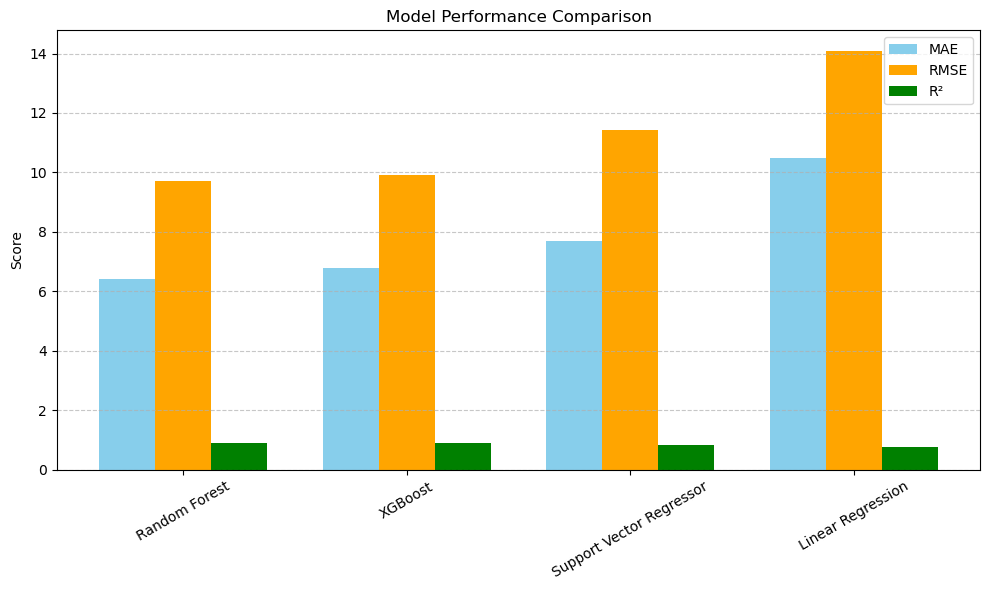

In [11]:
x = np.arange(len(results_df["Model"]))  # vị trí cột
width = 0.25  # độ rộng mỗi cột

plt.figure(figsize=(10, 6))
plt.bar(x - width,results_df["MAE"], width, label="MAE", color='skyblue')
plt.bar(x, results_df["RMSE"], width, label="RMSE", color='orange')
plt.bar(x + width, results_df["R2"], width, label="R²", color='green')

plt.xticks(x, results_df["Model"], rotation=30)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()